[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.5%20cufflinks%20%EB%A1%9C%20QuantFig%20%EA%B7%B8%EB%A6%AC%EA%B8%B0-input.ipynb)


<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

이미지 출처 : [Overviews — PyViz 0.0.1 documentation](https://pyviz.org/overviews/index.html)

## pandas의 plot 문법으로 plotly를 사용할 수 있는 cufflinks

* 판다스의 plot 을 iplot으로 변경만 하면 plotly의 동적인 시각화 기능을 사용할 수 있습니다.
* 기본적인 판다스 plot 뿐만 아니라 증권데이터 분석을 위한 **캔들차트, 볼린저밴드, MACD, RSI** 지표를 그려볼 수도 있습니다.
* plotly 의 Financial Charts 에 비해 기술적 분석 지표를 따로 계산하지 않고 코드 한 두 줄로 그려볼 수 있다는 장점이 있습니다.
* [santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)
* <font color="red">⚠️주의사항⚠️ : 다양한 라이브러리의 추상화된 고수준 인터페이스를 제공하기 있기 때문에 환경에 따라 라이브러리 버전간의 충돌이나 오류가 발생할 수 있습니다.</font> 

## 라이브러리 로드

In [2]:
# !pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ---------------------------------------- 81.7/81.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=4396c19ef2d1d88e2886d4b8b4000c638a0e8d18ae9ed20f2a6eea5e535b2136
  Stored in directory: c:\users\petpulslab\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [4]:
# 데이터 분석을 위한 pandas
# pandas로 plotly 시각화를 할 수 있는 cufflinks 로드하기
# cufflinks에서 iplot을 사용하면 plotly를 사용할 수 있다.
# cufflinks는 pandas를 지원하는 아주 강력한 도구이다. 
import pandas as pd
import numpy as np
import plotly 
import cufflinks as cf
cf.__version__

'0.17.3'

In [5]:
# 그래프가 주피터 노트북에서 표시되지 않는다면 아래 설정을 사용해 주세요.
cf.go_offline(connected = True)

In [6]:
# 강의에서 사용하는 버전보다 낮은 버전을 사용하면 동작하지 않을 수도 있습니다.
cf.__version__

'0.17.3'

## cufflinks 내장 데이터 불러오기

In [7]:
# cf.datagen.ohlcv(): 내장 데이터
df = cf.datagen.ohlcv()
df.shape

(100, 5)

## pandas를 통한 OHLC 데이터 시각화 하기

<Axes: >

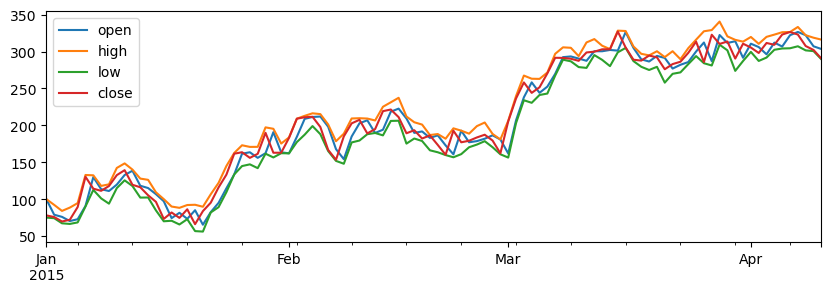

In [10]:
# "open", "high", "low", "close"
df[["open", "high", "low", "close"]].plot(figsize=(10,3))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

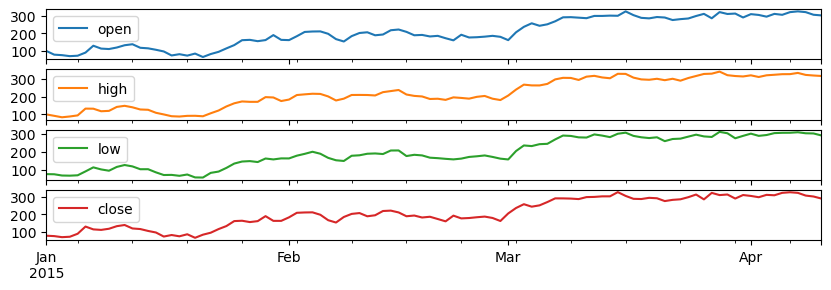

In [13]:
# subplots 그리기
df[["open", "high", "low", "close"]].plot(figsize=(10,3), subplots=True)

## cufflinks 를 통한 plotly 쉽게 사용하기

In [ ]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot()

In [14]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot(subplots=True)

## cufflinks 의 QuantFig 사용하기
* QuantFig 를 사용하면 캔들차드와 보조 지표 몇 가지를 쉽게 그려볼 수 있습니다.

In [26]:
qf = cf.QuantFig(df, name='캔들차트')

In [27]:
# qf.iplot() 으로 시각화 합니다.
qf.iplot()

## QuantFig 로 볼린저 밴드 그리기

[santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)

In [28]:
# add_bollinger_bands 로 볼린저 밴드를 추가합니다.
qf.add_bollinger_bands()

In [29]:
# qf.iplot() 으로 그래프를 보여줍니다.
qf.add_sma(10, color='red')
qf.iplot()

In [30]:
# QuantFig 를 통해 이동평균, 볼린저밴드, RSI, 거래량, MACD 값을 그립니다
qf = cf.QuantFig(df, name="캔들차트")
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

## 특정 주가를 가져와서 시각화 하기

In [22]:
# FinanceDataReader 로 테슬라: TSLA 주가 가져오기
import FinanceDataReader as fdr

In [32]:
tsla = fdr.DataReader("TSLA", "2020", "2021")
tsla.shape

(253, 6)

In [37]:
# QuantFig 를 통한 테슬라 주가 시각화
qf = cf.QuantFig(tsla, name = '테슬라')
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()